In [25]:
%matplotlib inline
from shapely.geometry import Point, Polygon
import geopandas as gpd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

In [3]:
mpl.__version__, pd.__version__, gpd.__version__

('1.5.1', '0.19.2', '0.2.1')

In [65]:
data_path = "../big_data_leave"

In [7]:
file = "/Harvey_FEMA_HCAD_Damage.json"
filePath = data_path+file
df = gpd.read_file(filePath)

In [8]:
print(type(df))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [9]:
df.head()

,ACCESS,ACCOUNT,ACCOUNT_1,ACCOUNT_12,ACREAGE,ADJ_CD,ADJ_UNIT_P,AG_VALUE,APPR_OVERR,APPR_OVE_1,...,USNG,VALUE,VALUE_STAT,WIND_SPEED,YR_ANNEXED,YR_IMPR,city,geometry,parcel_typ,zip
0,UNK,1202010030003,1202010030003,1202010030003,.2364,.810000,5.3500,0,1.0000,,...,,40125,Noticed,UNK,,2000,KATY,POINT (-95.73226883699994 29.73575664100002),0,77450
1,UNK,1202010030004,1202010030004,1202010030004,.2001,.810000,5.3500,0,1.0000,,...,,40125,Noticed,UNK,,2000,KATY,POINT (-95.73204898999995 29.73562839900006),0,77450
2,UNK,0402830000004,0402830000004,0402830000004,1.1946,.870000,23958.0000,0,1.0000,,...,,28620,Noticed,UNK,,2005,CROSBY,POINT (-94.99682199999995 29.98136228400006),0,77532
3,UNK,1068480000011,1068480000011,1068480000011,.1931,.650000,3.3000,0,1.0000,,...,,24750,Noticed,UNK,,1976,HOUSTON,POINT (-95.63591934699997 29.84071122500006),0,77084
4,UNK,1142710060011,1142710060011,1142710060011,.2011,.570000,3.5000,0,1.0000,,...,,22050,Noticed,UNK,,1979,HOUSTON,POINT (-95.65064504499998 29.83439115100003),0,77084


In [10]:
df.columns

Index(['ACCESS', 'ACCOUNT', 'ACCOUNT_1', 'ACCOUNT_12', 'ACREAGE', 'ADJ_CD',
       'ADJ_UNIT_P', 'AG_VALUE', 'APPR_OVERR', 'APPR_OVE_1',
       ...
       'USNG', 'VALUE', 'VALUE_STAT', 'WIND_SPEED', 'YR_ANNEXED', 'YR_IMPR',
       'city', 'geometry', 'parcel_typ', 'zip'],
      dtype='object', length=134)

In [41]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [19]:
# one feature
{"type":"Feature","geometry":{"type":"Point","coordinates":[-95.73226883699994,29.735756641000023]},"properties":{"OBJECTID":2,"Join_Count":1,"TARGET_FID":5070,"DMG_LEVEL":"AFF","DMG_TYPE":"FL","ASMT_TYPE":"MOD","IN_DEPTH":0.18953704834,"WIND_SPEED":"UNK","PGA":0,"ACCESS":"UNK","COUNTY":"Fort Bend","STATE":"TX","FIPS":48157,"PROD_DATE":"2017-09-02T00:00:00.000Z","IMG_DATE":"1899-11-30T00:00:00.000Z","EVENT_NAME":"Hurricane Harvey","EVENT_DATE":"1899-11-30T00:00:00.000Z","SOURCE":"FEMA","DIS_NUMBER":"DR-4332","COMMENTS":"","LONGITUDE":-95.7323,"LATITUDE":29.7358,"USNG":"","HCAD_NUM":"1202010030003","BLK_NUM":"","LOT_NUM":"","CONDO_FLAG":"0","parcel_typ":"0","CurrOwner":"HARDESTY LISA A &","LocAddr":"20407 ARROW FIELD LN","city":"KATY","zip":"77450","LocNum":20407,"LocName":"ARROW FIELD","Shape_STAr":10231.328125,"Shape_STLe":416.719006112,"ACCOUNT":"1202010030003","TAX_YEAR":"2017","MAILTO":"HARDESTY LISA A &","MAIL_ADDR_":"20407 ARROW FIELD LN","MAIL_ADDR1":"","MAIL_CITY":"KATY","MAIL_STATE":"TX","MAIL_ZIP":"77450-7416","MAIL_COUNT":"","UNDELIVERA":"N","STR_PFX":"","STR_NUM":20407,"STR_NUM_SF":"","STR_NAME":"ARROW FIELD","STR_SFX":"LN","STR_SFX_DI":"","STR_UNIT":"","SITE_ADDR_":"20407 ARROW FIELD LN","SITE_ADDR1":"KATY","SITE_ADD_1":"77450","STATE_CLAS":"A1","SCHOOL_DIS":"19","MAP_FACET":"4556C","KEY_MAP":"486T","NEIGHBORHO":"2915.08","NEIGHBOR_1":"19015","MARKET_ARE":"341","MARKET_A_1":"ISD 19 - South of I-10 Katy Freeway","MARKET_A_2":"341","MARKET_A_3":"ISD 19 - South of I-10 Katy Freeway","ECON_AREA":"","ECON_BLD_C":"","CENTER_COD":"90","YR_IMPR":"2000","YR_ANNEXED":"","SPLT_DT":"","DSC_CD":"","NXT_BUILDI":"2","TOTAL_BUIL":"2161","TOTAL_LAND":"10298","ACREAGE":".2364","CAP_ACCOUN":"N","SHARED_CAD":"Y","LAND_VALUE":"41622","IMPROVEMEN":"209721","EXTRA_FEAT":"0","AG_VALUE":"0","ASSESSED_V":"251343","TOTAL_APPR":"251343","TOTAL_MARK":"251343","PRIOR_LND_":"41622","PRIOR_IMPR":"209721","PRIOR_X_FE":"0","PRIOR_AG_V":"0","PRIOR_TOTA":"251343","PRIOR_TO_1":"251343","NEW_CONSTR":"0","TOTAL_RCN_":"263198","VALUE_STAT":"Noticed","NOTICED":"Y","NOTICE_DAT":"2017-03-31 00:00:00.000","PROTESTED":"N","CERTIFIED_":"2017-08-11 00:00:00.000","LAST_INSPE":"2010-02-15 00:00:00.000","LAST_INS_1":"01348","NEW_OWNER_":"2001-02-23 00:00:00.000","LEGAL_DSCR":"LT 3 BLK 3","LEGAL_DS_1":"(HC* L 8% & I 0%)","LEGAL_DS_2":"CINCO RANCH EQUESTRIAN VILLAGE SEC 3","LEGAL_DS_3":"","JURS":"Split Account: See Split Jurs","ACCOUNT_1":"1202010030003","BUILDING_N":1,"CODE":"4","ADJ_CD":".810000","STRUCTURE_":"CDU","TYPE_DESCR":"Cond / Desir / Util","CATEGORY_D":"Average","STATE_CL_1":"A1","ACCOUNT_12":"1202010030003","LINE_NUMBE":1,"LAND_USE_C":"1001","LAND_USE_D":"Res Improved Table Value","SITE_CD":"SF1","SITE_CD_DS":"Primary SF","SITE_ADJ":"1.0000","UNIT_TYPE":"SF","UNITS":"7500.0000","SIZE_FACTO":"1.0000","SITE_FACT":"1.0000","APPR_OVERR":"1.0000","APPR_OVE_1":"","TOT_ADJ":"1.0000","UNIT_PRICE":"5.35","ADJ_UNIT_P":"5.3500","VALUE":"40125","OVERRIDE_V":""}},

({'geometry': {'coordinates': [-95.73226883699994, 29.735756641000023],
   'type': 'Point'},
  'properties': {'ACCESS': 'UNK',
   'ACCOUNT': '1202010030003',
   'ACCOUNT_1': '1202010030003',
   'ACCOUNT_12': '1202010030003',
   'ACREAGE': '.2364',
   'ADJ_CD': '.810000',
   'ADJ_UNIT_P': '5.3500',
   'AG_VALUE': '0',
   'APPR_OVERR': '1.0000',
   'APPR_OVE_1': '',
   'ASMT_TYPE': 'MOD',
   'ASSESSED_V': '251343',
   'BLK_NUM': '',
   'BUILDING_N': 1,
   'CAP_ACCOUN': 'N',
   'CATEGORY_D': 'Average',
   'CENTER_COD': '90',
   'CERTIFIED_': '2017-08-11 00:00:00.000',
   'CODE': '4',
   'COMMENTS': '',
   'CONDO_FLAG': '0',
   'COUNTY': 'Fort Bend',
   'CurrOwner': 'HARDESTY LISA A &',
   'DIS_NUMBER': 'DR-4332',
   'DMG_LEVEL': 'AFF',
   'DMG_TYPE': 'FL',
   'DSC_CD': '',
   'ECON_AREA': '',
   'ECON_BLD_C': '',
   'EVENT_DATE': '1899-11-30T00:00:00.000Z',
   'EVENT_NAME': 'Hurricane Harvey',
   'EXTRA_FEAT': '0',
   'FIPS': 48157,
   'HCAD_NUM': '1202010030003',
   'IMG_DATE': '1899-11-

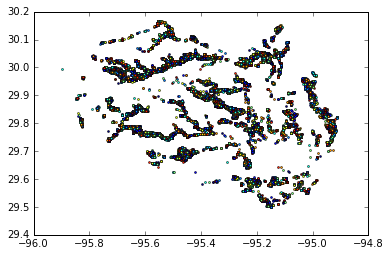

In [26]:
### NOTE: This takes about 7-12 minutes to run.
df.plot()

In [28]:
df_reduced = df[['ACCOUNT','HCAD_NUM','KEY_MAP','ACREAGE','CONDO_FLAG','LAND_USE_C','COUNTY','LAND_USE_D','LAND_VALUE','DMG_LEVEL','FIPS','IMPROVEMEN','IN_DEPTH','LATITUDE','LONGITUDE','LocNum','LocName','LocAddr','MAIL_CITY','city','MAIL_STATE','MAIL_ZIP','SCHOOL_DIS','NEIGHBORHO','NEIGHBOR_1','NEW_CONSTR','TAX_YEAR','TOTAL_APPR','TOTAL_BUIL','TOTAL_LAND','TOTAL_MARK','TOTAL_RCN_','UNITS','UNIT_PRICE','UNIT_TYPE','YR_IMPR']]

In [29]:
df_reduced.head()

,ACCOUNT,HCAD_NUM,KEY_MAP,ACREAGE,CONDO_FLAG,LAND_USE_C,COUNTY,LAND_USE_D,LAND_VALUE,DMG_LEVEL,FIPS,IMPROVEMEN,IN_DEPTH,LATITUDE,LONGITUDE,LocNum,LocName,LocAddr,MAIL_CITY,city,MAIL_STATE,MAIL_ZIP,SCHOOL_DIS,NEIGHBORHO,NEIGHBOR_1,NEW_CONSTR,TAX_YEAR,TOTAL_APPR,TOTAL_BUIL,TOTAL_LAND,TOTAL_MARK,TOTAL_RCN_,UNITS,UNIT_PRICE,UNIT_TYPE,YR_IMPR
0,1202010030003,1202010030003,486T,.2364,0,1001,Fort Bend,Res Improved Table Value,41622,AFF,48157,209721,0.189537,29.7358,-95.7323,20407,ARROW FIELD,20407 ARROW FIELD LN,KATY,KATY,TX,77450-7416,19,2915.08,19015,0,2017,251343,2161,10298,251343,263198,7500.0000,5.35,SF,2000
1,1202010030004,1202010030004,486T,.2001,0,1001,Fort Bend,Res Improved Table Value,40776,AFF,48157,232781,0.559052,29.7356,-95.7320,20403,ARROW FIELD,20403 ARROW FIELD LN,KATY,KATY,TX,77450-7416,19,2915.08,19015,0,2017,273557,2707,8717,273557,292149,7500.0000,5.35,SF,2000
2,0402830000004,0402830000004,381A,1.1946,0,2003,Liberty,Res Improved Override (Res. Use),28620,MAJ,48291,269280,5.530396,29.9814,-94.9968,20950,SHADY,20950 SHADY LN,CROSBY,CROSBY,TX,77532-6610,05,2255.05,5051,0,2017,298000,3114,52036,298000,363454,1.1946,23958.00,AC,2005
3,1068480000011,1068480000011,448F,.1931,0,1001,Harris,Res Improved Table Value,25050,MIN,48201,143489,2.645287,29.8407,-95.6359,15702,TUMBLING RAPIDS,15702 TUMBLING RAPIDS DR,CYPRESS,HOUSTON,TX,77429-3851,19,2906.00,19036,0,2017,168539,2160,8410,168539,220753,7500.0000,3.30,SF,1976
4,1142710060011,1142710060011,448E,.2011,0,1001,Harris,Res Improved Table Value,22911,AFF,48201,96345,0.772430,29.8344,-95.6506,4142,SCONE,4142 SCONE ST,HOUSTON,HOUSTON,TX,77084-4073,19,2897.00,19038,0,2017,113580,1647,8760,120319,169027,6300.0000,3.50,SF,1979


In [40]:
type(df_reduced)

pandas.core.frame.DataFrame

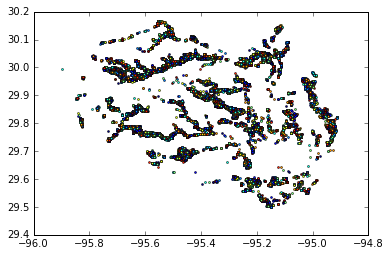

In [30]:
### NOTE: This takes about 7-12 minutes to run.
df.plot()

In [36]:
df_reduced.city.unique()

array(['KATY', 'CROSBY', 'HOUSTON', 'BAYTOWN', 'CHANNELVIEW', 'HIGHLANDS',
       '', 'SPRING', 'HUMBLE', 'KINGWOOD', 'TOMBALL', 'CYPRESS', 'HUFFMAN',
       'NEW CANEY', 'PORTER', 'HOCKLEY', 'DAYTON', 'GALENA PARK',
       'LA PORTE', 'BELLAIRE', 'PASADENA', 'SEABROOK', 'FRIENDSWOOD',
       'WEBSTER', 'SOUTH HOUSTON', 'PEARLAND', 'STAFFORD', 'LEAGUE CITY',
       'NONE', 'NASSAU BAY', 'DEER PARK'], dtype=object)

In [32]:
# make a dataframe from reduced data frame that is only katy.
df_reduced_katy = df_reduced[df_reduced['city'].str.contains("KATY")]
df_reduced_katy.head()

,ACCOUNT,HCAD_NUM,KEY_MAP,ACREAGE,CONDO_FLAG,LAND_USE_C,COUNTY,LAND_USE_D,LAND_VALUE,DMG_LEVEL,FIPS,IMPROVEMEN,IN_DEPTH,LATITUDE,LONGITUDE,LocNum,LocName,LocAddr,MAIL_CITY,city,MAIL_STATE,MAIL_ZIP,SCHOOL_DIS,NEIGHBORHO,NEIGHBOR_1,NEW_CONSTR,TAX_YEAR,TOTAL_APPR,TOTAL_BUIL,TOTAL_LAND,TOTAL_MARK,TOTAL_RCN_,UNITS,UNIT_PRICE,UNIT_TYPE,YR_IMPR
0,1202010030003,1202010030003,486T,.2364,0,1001,Fort Bend,Res Improved Table Value,41622,AFF,48157,209721,0.189537,29.7358,-95.7323,20407,ARROW FIELD,20407 ARROW FIELD LN,KATY,KATY,TX,77450-7416,19,2915.08,19015,0,2017,251343,2161,10298,251343,263198,7500.0000,5.35,SF,2000
1,1202010030004,1202010030004,486T,.2001,0,1001,Fort Bend,Res Improved Table Value,40776,AFF,48157,232781,0.559052,29.7356,-95.7320,20403,ARROW FIELD,20403 ARROW FIELD LN,KATY,KATY,TX,77450-7416,19,2915.08,19015,0,2017,273557,2707,8717,273557,292149,7500.0000,5.35,SF,2000
114,0220120000001,0220120000001,444Y,1.2186,0,2000,Fort Bend,Res Vacant Override,212328,AFF,48157,0,1.050186,29.7878,-95.8250,0,THIRD,0 THIRD ST,KATY,KATY,TX,77492-0147,19,2923.02,19001,0,2017,212328,0,53082,212328,0,53082.0000,7.00,SF,
150,1202010010026,1202010010026,486T,1.1930,0,,Fort Bend,,2598,AFF,48157,0,0.189056,29.7363,-95.7335,0,FRY,0 S FRY BLVD,KATY,KATY,TX,77494-4569,19,2915.08,19015,0,2017,100,0,51967,2598,0,,,,
154,1276020010018,1276020010018,446D,.1188,0,1001,Harris,Res Improved Table Value,21477,AFF,48201,127523,0.657578,29.8477,-95.7075,5039,RUSTLING BRANCH,5039 RUSTLING BRANCH LN,SCOTTSDALE,KATY,AZ,85261-4090,04,194.02,4054,0,2017,149000,1664,5175,149000,151949,5040.0000,4.25,SF,2006


In [33]:
df_reduced_katy.describe()

,FIPS,IN_DEPTH,LATITUDE,LONGITUDE,LocNum
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,48203.541714,1.174577,29.846157,-95.731629,10351.461143
std,26.778280,1.226383,0.027704,0.036152,7456.348007
min,48157.000000,0.003906,29.735600,-95.848800,0.000000
25%,48201.000000,0.409264,29.849600,-95.729600,5515.000000
50%,48201.000000,0.840714,29.852600,-95.721800,5735.000000
75%,48201.000000,1.585253,29.855800,-95.710700,19703.000000
max,48473.000000,13.828423,29.904500,-95.692300,27711.000000


### Writing to file the reduced geojson for only the city of KATY

In [39]:
type(df_reduced_katy)

pandas.core.frame.DataFrame

In [66]:
geometry = [Point(xy) for xy in zip(df_reduced_katy.LONGITUDE, df_reduced_katy.LATITUDE)]
crs = {'init':'epsg:4326'}
df_reduced_katy_gpd = gpd.GeoDataFrame(df_reduced_katy, crs=crs, geometry=geometry)
type(df_reduced_katy_gpd)

geopandas.geodataframe.GeoDataFrame

In [67]:
katy_out = data_path+"/Harvey_FEMA_HCAD_Damage_reduced_katy2.geojson"

In [68]:
df_reduced_katy_gpd.to_file(katy_out, driver='GeoJSON')

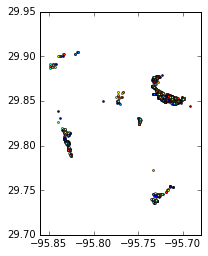

In [82]:
df_reduced_katy_gpd.plot()

### Writing to file the reduced geojson for all of Harris County

In [77]:
# df_reduced
geometry = [Point(xy) for xy in zip(df_reduced.LONGITUDE, df_reduced.LATITUDE)]
crs = {'init':'epsg:4326'}
df_reduced_gpd = gpd.GeoDataFrame(df_reduced, crs=crs, geometry=geometry)
type(df_reduced_gpd)

geopandas.geodataframe.GeoDataFrame

In [80]:
reduced_out = data_path+"/Harvey_FEMA_HCAD_Damage_reduced.geojson"

In [81]:
df_reduced_gpd.to_file(reduced_out, driver='GeoJSON')